## Task 1: prediction using supervised machine learning model.

In this regression task I will be predicting the percentage of score a student is expected to score based on the number of hours they have studied.

We are using only two variables so this can be solved by a simple linear regression.

In [215]:
## importing the required libraries to access the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Step 1: Import and Read data from source

In [216]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print("Data import successfully")

student_data.head(10)

Data import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [218]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2: Input data visualization

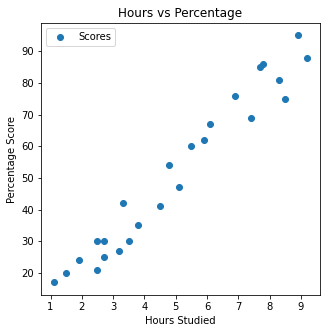

In [219]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

## Step 3: Data processing


This is the step where we divide the data into Attributes(input) and labels(output).

In [209]:
X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

## Step 4 : Model Training

Splitting the data into trianing and testing sets and then training the algorithm.

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


In [153]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Step 5: Plotting the Line of regression

now that we have trained we have to visualize the best fit line for regression

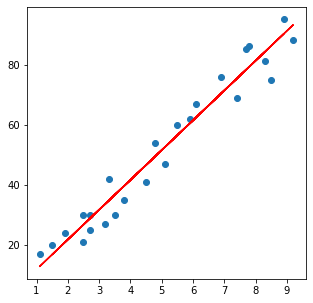

In [200]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

## Step 6: Making Predictions

after training we have to test the model by making some predictions.

In [168]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step 7 : Comparing Actual result to the Predicted Model result

In [203]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred}) 
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [220]:
#Estimating training and test score
print("Training Score in Percentage:",round(regressor.score(X_train,y_train)*100,2),"%")
print("Test Score in Percentage:",round(regressor.score(X_test,y_test)*100,2),"%")

Training Score in Percentage: 95.16 %
Test Score in Percentage: 94.55 %


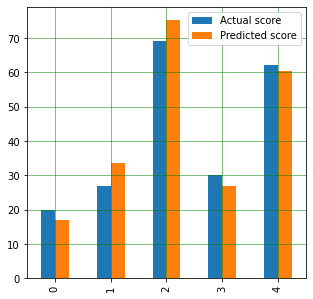

In [213]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [198]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {round(own_pred[0],2)} %")

No of Hours = 9.25
Predicted Score = 93.69 %


## Step 8: Evaluate the model

This is the final step in every machine learrning task..i.e. to evaluate the model to compare how well each algorithm performs on different data set.Here i have used the sklearn's metric library to calculate the error and compare the performance to and to predict the accuracy.

In [204]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
